# Task_1

### Data Analysis
- In this session we will do analysis process on a review data and conclude findings in a graph.
- We will use a panadas library for Data Analysis process.
- Seaborn and Plotly libraries will be used for graphical representation of findings.

#### Step_1
- Importing a important libraries for analysis.

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import plotly.express as px

#### Step_2
- In this we will clean the data set and do analysis on it.

In [20]:
# Load Dataset
df = pd.read_csv('Review_data.csv')
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | I will never travel with Br...
1,1,✅ Trip Verified | I am already in Portugal so...
2,2,✅ Trip Verified | Terrible. Avoid this airlin...
3,3,✅ Trip Verified | Despite being a gold member...
4,4,Not Verified | Regarding the aircraft and seat...


In [21]:
# Deleting first column
df = df.drop(columns=['Unnamed: 0'])
df.head()

,reviews
0,✅ Trip Verified | I will never travel with Br...
1,✅ Trip Verified | I am already in Portugal so...
2,✅ Trip Verified | Terrible. Avoid this airlin...
3,✅ Trip Verified | Despite being a gold member...
4,Not Verified | Regarding the aircraft and seat...


In [22]:
# Deleting verified tag from all reviews
df.reviews= df.reviews.str.split('|',expand=True)[1]
df.head()

,reviews
0,I will never travel with British Airways aga...
1,I am already in Portugal so contacted them t...
2,Terrible. Avoid this airline. It’s now becom...
3,"Despite being a gold member, the British Air..."
4,Regarding the aircraft and seat: The business...


In [23]:
# Cleaning the unknown characters
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,I will never travel with British Airways aga...,I will never travel with British Airways agai...
1,I am already in Portugal so contacted them t...,I am already in Portugal so contacted them to...
2,Terrible. Avoid this airline. It’s now becom...,Terrible Avoid this airline It s now becoming...
3,"Despite being a gold member, the British Air...",Despite being a gold member the British Airwa...
4,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...


In [24]:
# Deleting review column
df = df.drop(columns=['reviews'])

# Changing column name
df.rename(columns= {'Cleaned Reviews':'Reviews'}, inplace=True)

df.head()

,Reviews
0,I will never travel with British Airways agai...
1,I am already in Portugal so contacted them to...
2,Terrible Avoid this airline It s now becoming...
3,Despite being a gold member the British Airwa...
4,Regarding the aircraft and seat The business ...


In [17]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model
    for abbreviation words,collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WASIF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WASIF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WASIF\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
"""The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the 
contents of a diverse set of corpora."""


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\WASIF\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\WASIF\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Reviews,POS tagged
0,I will never travel with British Airways agai...,"[(never, r), (travel, v), (British, a), (Airwa..."
1,I am already in Portugal so contacted them to...,"[(already, r), (Portugal, n), (contacted, v), ..."
2,Terrible Avoid this airline It s now becoming...,"[(Terrible, a), (Avoid, n), (airline, n), (bec..."
3,Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri..."
4,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu..."


In [26]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Reviews,POS tagged,Lemma
0,I will never travel with British Airways agai...,"[(never, r), (travel, v), (British, a), (Airwa...",never travel British Airways spend business ...
1,I am already in Portugal so contacted them to...,"[(already, r), (Portugal, n), (contacted, v), ...",already Portugal contact today cancel return...
2,Terrible Avoid this airline It s now becoming...,"[(Terrible, a), (Avoid, n), (airline, n), (bec...",Terrible Avoid airline become regular practi...
3,Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri...",Despite gold member British Airways staff He...
4,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu...",Regarding aircraft seat business class seat ...


#### Step_3
- VADER stands for Valence Aware Dictionary and Sentiment Reasoner.
- Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [27]:
pip install vaderSentiment


     ------------------------------------ 126.0/126.0 kB 826.5 kB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I will never travel with British Airways agai...,"[(never, r), (travel, v), (British, a), (Airwa...",never travel British Airways spend business ...,-0.9643,Negative
1,I am already in Portugal so contacted them to...,"[(already, r), (Portugal, n), (contacted, v), ...",already Portugal contact today cancel return...,-0.2263,Negative
2,Terrible Avoid this airline It s now becoming...,"[(Terrible, a), (Avoid, n), (airline, n), (bec...",Terrible Avoid airline become regular practi...,-0.7430,Negative
3,Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri...",Despite gold member British Airways staff He...,0.7951,Positive
4,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu...",Regarding aircraft seat business class seat ...,0.8676,Positive


In [29]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    521
Negative    373
Neutral     106
Name: Analysis, dtype: int64

In [39]:
df.to_csv("BA_reviews.csv")

([<matplotlib.patches.Wedge at 0x1b07c874250>,
 [Text(-0.07251825311279125, 1.0976069893023956, 'Positive'),
  Text(-0.29026018409844623, -1.0610132070465175, 'Negative'),
  Text(1.275835215204122, -0.44129865583870975, 'Neutral')],
 [Text(-0.03955541078879523, 0.5986947214376703, '52.1%'),
  Text(-0.15832373678097067, -0.5787344765708277, '37.3%'),
  Text(0.80330365401741, -0.27785470923178024, '10.6%')])

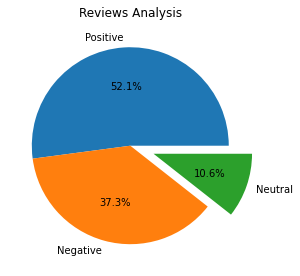

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [36]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

In [40]:
show_wordcloud(df['Lemma'])

ValueError: Only supported for TrueType fonts